In [3]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from pycaret.classification import *

In [4]:
from matplotlib import font_manager, rc
font_path= 'C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#### 통합 데이터 불러오기

In [5]:
df = pd.read_csv('../data_2/cow_체고0제거.csv') 
df.head()

,개월령,생시체중,근내평균,도체범위근내평균,체고,체장,형매도축수,형매도체평균,형매근내평균,형매근내평균가산,6개월내출산,농가근내평균,농가근내평균가산,근내EPD,근내,점수,농가구분,TARGET1
0,46,644.64,3.34,3.23,131.4,158.9,NaN,NaN,NaN,NaN,N,4.16,-1.05,0.18,6,4,농가소,0
1,46,633.93,4.59,4.52,129.7,148.4,NaN,NaN,NaN,NaN,Y,4.16,-1.05,0.17,4,3,농가소,0
2,32,567.86,5.50,4.89,130.3,158.0,NaN,NaN,NaN,NaN,N,5.58,0.53,0.42,7,5,농가소,1
3,33,564.29,6.13,5.56,130.7,155.9,NaN,NaN,NaN,NaN,Y,3.78,-0.91,0.42,2,2,농가소,0
4,48,692.86,4.79,4.61,131.2,146.1,NaN,NaN,NaN,NaN,Y,3.90,-1.35,0.82,4,3,농가소,0


In [9]:
df_copy = df.copy()
print(df_copy.shape)
df_copy.head(1)

(99848, 18)


,개월령,생시체중,근내평균,도체범위근내평균,체고,체장,형매도축수,형매도체평균,형매근내평균,형매근내평균가산,6개월내출산,농가근내평균,농가근내평균가산,근내EPD,근내,점수,농가구분,TARGET1
0,46,644.64,3.34,3.23,131.4,158.9,NaN,NaN,NaN,NaN,N,4.16,-1.05,0.18,6,4,농가소,0


In [11]:
df_copy.columns = ['개월령', '생시체중', '근내평균', '도체범위근내평균', '체고', '체장', '형매도축수', '형매도체평균',
       '형매근내평균', '형매근내평균가산', '출산여부_6개월내', '농가근내평균', '농가근내평균가산', '근내EPD', '근내',
       '점수', '농가구분', 'TARGET1']

df_copy.columns

Index(['개월령', '생시체중', '근내평균', '도체범위근내평균', '체고', '체장', '형매도축수', '형매도체평균',
       '형매근내평균', '형매근내평균가산', '출산여부_6개월내', '농가근내평균', '농가근내평균가산', '근내EPD', '근내',
       '점수', '농가구분', 'TARGET1'],
      dtype='object')

##### train_test_split 7:3

In [13]:
exp = setup(data=df_copy, target='TARGET1', ignore_features=['근내','점수'], 
            categorical_features=['출산여부_6개월내','농가구분'], session_id=2023,
            train_size=0.7, use_gpu = True)

  File "c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\Project\cow\venvt\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\jun99\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\jun99\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\jun99\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,2023
1,Target,TARGET1
2,Target type,Binary
3,Original data shape,"(99848, 18)"
4,Transformed data shape,"(99848, 16)"
5,Transformed train set shape,"(69893, 16)"
6,Transformed test set shape,"(29955, 16)"
7,Ignore features,2
8,Ordinal features,2
9,Numeric features,13


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

In [16]:
best_10 = compare_models(sort='Precision', n_select=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8507,0.0000,0.0122,0.7095,0.0239,0.0190,0.0792,0.2670
lightgbm,Light Gradient Boosting Machine,0.8568,0.7944,0.1475,0.5991,0.2366,0.1883,0.2459,2.6040
gbc,Gradient Boosting Classifier,0.8562,0.7938,0.1456,0.5911,0.2334,0.1849,0.2415,11.4400
lda,Linear Discriminant Analysis,0.8552,0.7869,0.1221,0.5907,0.2022,0.1589,0.2205,0.3290
lr,Logistic Regression,0.8552,0.7874,0.1356,0.5813,0.2197,0.1727,0.2297,1.8370
ada,Ada Boost Classifier,0.8549,0.7876,0.1494,0.5672,0.2363,0.1853,0.2367,3.0780
rf,Random Forest Classifier,0.8529,0.7707,0.1597,0.5381,0.2461,0.1904,0.2343,1.7830
et,Extra Trees Classifier,0.8496,0.7605,0.1562,0.5007,0.2380,0.1793,0.2173,1.2510
qda,Quadratic Discriminant Analysis,0.8412,0.7573,0.2687,0.4532,0.3372,0.2537,0.2649,0.2790
svm,SVM - Linear Kernel,0.7832,0.0000,0.2517,0.3910,0.1638,0.1028,0.1452,1.7040


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8568,0.7944,0.1475,0.5991,0.2366,0.1883,0.2459,2.3850
gbc,Gradient Boosting Classifier,0.8562,0.7938,0.1456,0.5911,0.2334,0.1849,0.2415,11.7820
ada,Ada Boost Classifier,0.8549,0.7876,0.1494,0.5672,0.2363,0.1853,0.2367,3.0640
lr,Logistic Regression,0.8552,0.7874,0.1356,0.5813,0.2197,0.1727,0.2297,1.9270
lda,Linear Discriminant Analysis,0.8552,0.7869,0.1221,0.5907,0.2022,0.1589,0.2205,0.3430
nb,Naive Bayes,0.7996,0.7737,0.4914,0.3736,0.4245,0.3058,0.3101,0.2690
rf,Random Forest Classifier,0.8529,0.7707,0.1597,0.5381,0.2461,0.1904,0.2343,1.7830
et,Extra Trees Classifier,0.8496,0.7605,0.1562,0.5007,0.2380,0.1793,0.2173,1.2400
qda,Quadratic Discriminant Analysis,0.8412,0.7573,0.2687,0.4532,0.3372,0.2537,0.2649,0.2870
knn,K Neighbors Classifier,0.8340,0.6304,0.1276,0.3562,0.1878,0.1177,0.1372,0.7180


In [20]:
lr = create_model('lr', fold=2)
lg = create_model('lightgbm', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8554,0.7857,0.1335,0.5855,0.2174,0.1711,0.2294
1,0.8550,0.7890,0.1389,0.5753,0.2237,0.1755,0.2307
Mean,0.8552,0.7873,0.1362,0.5804,0.2206,0.1733,0.2300
Std,0.0002,0.0016,0.0027,0.0051,0.0031,0.0022,0.0007


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8553,0.7901,0.1542,0.5703,0.2428,0.1910,0.2419
1,0.8557,0.7907,0.1358,0.5891,0.2207,0.1742,0.2326
Mean,0.8555,0.7904,0.1450,0.5797,0.2318,0.1826,0.2372
Std,0.0002,0.0003,0.0092,0.0094,0.0110,0.0084,0.0046


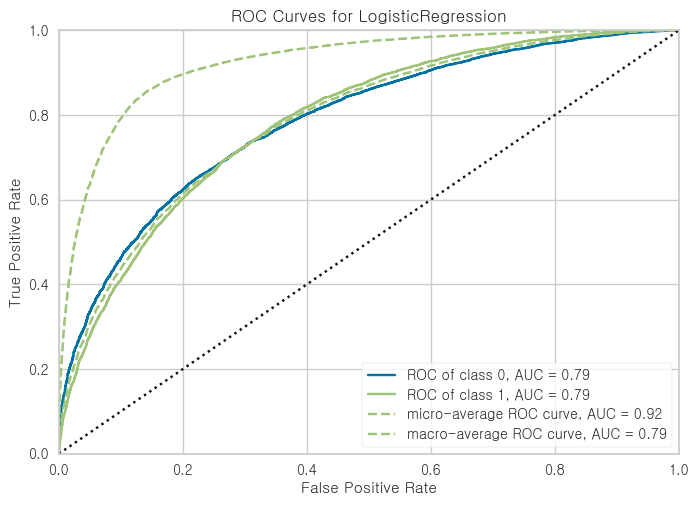

In [23]:
plot_model(lr, 'auc')

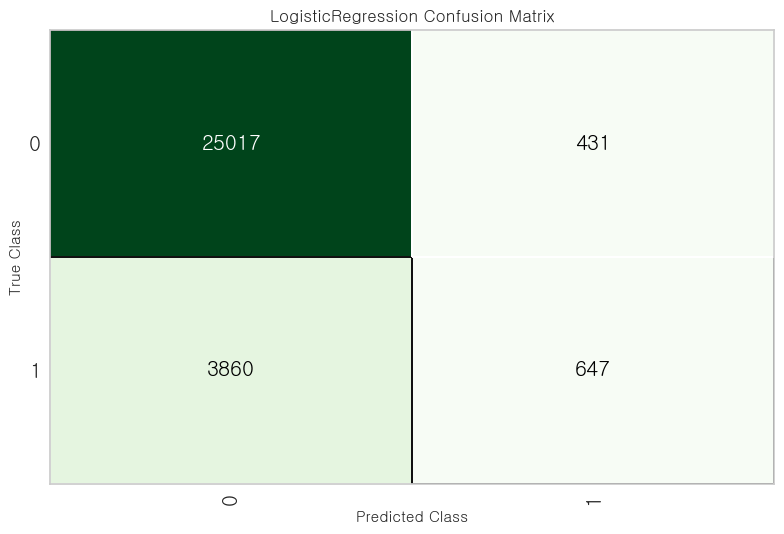

In [24]:
plot_model(lr, 'confusion_matrix')

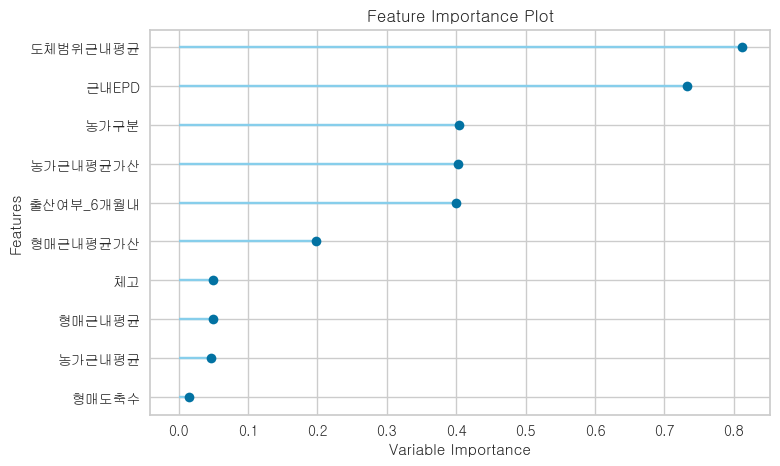

In [25]:
plot_model(lr, 'feature')

In [27]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16912886579649191130
 xla_global_id: -1]